# PNA/Influenza data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
d = pd.read_csv("/Users/joshsteinbecker/jts_project/Data/PNA_raw/PNA Flu Mortality USA.csv")
df = pd.DataFrame(d)
df

,geoid,Region,State,age,season,MMWR Year/Week,Deaths from influenza,Deaths from pneumonia,Deaths from pneumonia and influenza,All Deaths,Pecent of deaths due to pneumonia or influenza,pecent complete
0,State,NaN,Maryland,All,2017-18,201831,NaN,NaN,64.0,949.0,6.743941,113.919027
1,State,NaN,Texas,All,2017-18,201819,NaN,NaN,242.0,3664.0,6.604803,114.085145
2,State,NaN,Pennsylvania,All,2017-18,201802,NaN,NaN,282.0,3185.0,8.854003,132.193632
3,State,NaN,Colorado,All,2017-18,201818,NaN,NaN,41.0,702.0,5.840456,114.551843
4,State,NaN,Maryland,All,2017-18,201807,NaN,NaN,87.0,1060.0,8.207547,127.243592
...,...,...,...,...,...,...,...,...,...,...,...,...
32601,State,NaN,New York,All,2011-12,201209,NaN,NaN,159.0,1977.0,8.042489,108.443629
32602,State,NaN,Kentucky,All,2016-17,201648,NaN,NaN,88.0,960.0,9.166667,118.490521
32603,State,NaN,South Carolina,All,2014-15,201502,NaN,NaN,106.0,1075.0,9.860465,134.847612
32604,Region,8.0,NaN,All,2013-14,201424,1.0,112.0,113.0,1479.0,7.640297,105.555916


In [48]:
df['week'] = df["MMWR Year/Week"] % (df['MMWR Year/Week'] - (df["MMWR Year/Week"] % 100))
df['year'] = (df['MMWR Year/Week'] - (df["MMWR Year/Week"] % 100)) // 100
df = df[df.age == "All"]
df = df.sort_values(by='MMWR Year/Week')
df['partial year'] = df['year'] + (df['week'] / 52)
df =df[df['age'] == "All"]
df = df[df['geoid'] == 'National']

In [56]:
x = df["partial year"]
y = df['Deaths from pneumonia']
z = df['Deaths from influenza']

/var/folders/sz/0lyp_0wx3mgdzpg0t_hg1zh40000gn/T/ipykernel_5454/1853015817.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend("right",labels=("PNA","Flu"))


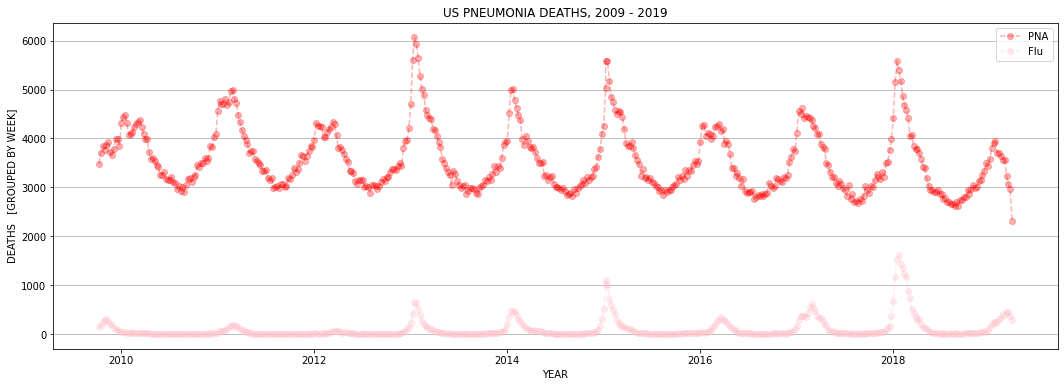

In [68]:
#fig, ax = plt.subplots()
plt.figure(figsize=(18,6))
plt.xlabel('YEAR')
plt.ylabel('DEATHS   [GROUPED BY WEEK]')
plt.title('US PNEUMONIA DEATHS, 2009 - 2019')
plt.grid(which="major",axis="y")
plt.plot(x,y,"o--",alpha=0.3,color="red")
plt.plot(x,z,"o--",alpha=0.3,color="pink")
plt.legend("right",labels=("PNA","Flu"))

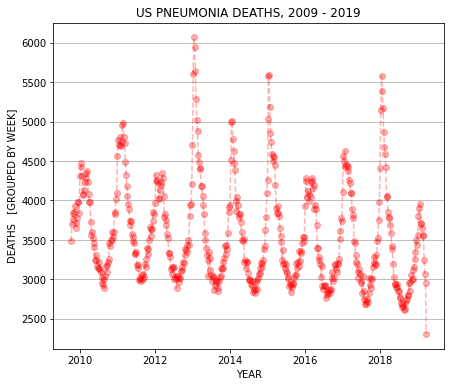

In [53]:
#fig, ax = plt.subplots()
plt.figure(figsize=(7,6))
plt.xlabel('YEAR')
plt.ylabel('DEATHS   [GROUPED BY WEEK]')
plt.title('US PNEUMONIA DEATHS, 2009 - 2019')
plt.grid(which="major",axis="y")
plt.plot(x,y,"o--",alpha=0.3,color="red")

In [54]:
print("Weekly Deaths, min, max:",min(y),max(y))
print("TOTAL: ",sum(y))

Weekly Deaths, min, max: 2309.0 6065.0
TOTAL:  1762858.0


Text(0.5, 1.0, 'WEEK vs PNA DEATHS, USA, 2009-2019')

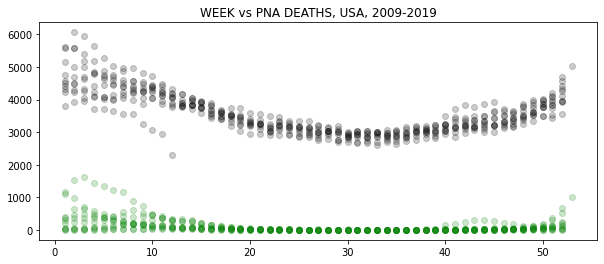

In [55]:
plt.figure(figsize = (10,4))
plt.scatter(df['week'],df['Deaths from pneumonia'],alpha=0.2,color='black')
plt.scatter(df['week'],df['Deaths from influenza'],alpha=0.2,color='green')
plt.title("WEEK vs PNA DEATHS, USA, 2009-2019")